# Numerical Integration

In this lab, we explore ways to approximate definite integrals which cannot be integrated using the Fundamental Theorem of Calculus. Use Python to solve each problem. 

## Importing Packages

In [1]:
from numpy import *
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy as sci 

Matplotlib is building the font cache; this may take a moment.


## Example 01

Given the integral $\int_0^{\frac{\pi}{2}} \sqrt[3]{1+\cos(x)}dx$

* Plot the function on the domain $x \in \left[0,\dfrac{\pi}{2}\right]$.\
Recall the Left Endpoint Riemann Sum: 

$$\int_a^bf(x)dx \approx \sum_{i=1}^{n}f(x_{i-1})\Delta x$$

where $\Delta x  = \frac{b-a}{n}$ and $x_{i}=a+i  \Delta x$. This is easy to compute in python:
* Define a list $x$ from a (inclusive) to $b$ (exclusive) with stepsize $\Delta x$ 
* Define a list $y = f (x)$.
* Sum the list $y$ and multiply by $\Delta x$.
* Compute the Left Endpoint approximation using n = 100 subintervals.

In [2]:
def integrand(x):
    result = np.cbrt(1+np.cos(x))
    return result 

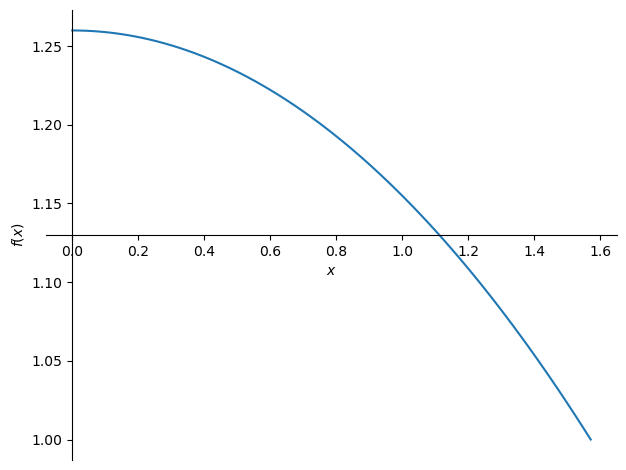

In [3]:
a = 0
b = np.pi/2
n = 100
x = sp.symbols('x')
f = (1+sp.cos(x))**(1/3)
sp.plot(f,(x,a,b))


In [4]:
dx = (b-a)/n
xleft = np.zeros(n)
for i in range(0,n):
    xleft[i] = a + i*dx
    
yleft = integrand(xleft)
LR = sum(yleft)*dx
print('The left end point approximation is',LR)

The left end point approximation is 1.8452842494259876


## Example 02 
The Right End Point Riemann Sum is the same process, but starting at $a+\Delta x$ and ending at $b$ (inclusive). Compute the Right End Point approximation using $n=100$ subintervals. 


In [5]:
xright = arange(a+dx,b+dx,dx)
yright = integrand(xright)
RL = sum(yright)*dx
print('The right-endpoint approximationis',RL)

The right-endpoint approximationis 1.8412014191216723


## Example 03
The Midpoint Sum is again the same process, but starting at $a + \frac{\Delta x}{2}$ and ending at $b − \frac{\Delta x}{2}$ (inclusive).

* Compute the Midpoint approximation using $n = 100$ subintervals.
* Compute the average of the Left and Right Endpoint approximations. Is this equal to the Midpoint approximation?

In [6]:
xmidPt = arange(a+dx/2,b-dx/2,dx)
ymidPt = integrand(xmidPt)
MP = sum(ymidPt)*dx
print("The Mid point sum is", MP)

The Mid point sum is 1.827504136100208


In [7]:
Avg = (LR+RL)/2
print("The average of the Left and Right End point approximations is", Avg)

The average of the Left and Right End point approximations is 1.84324283427383


**The average of left and right end point approximations is equal to the Mid point sum upto three decimal places.** 

## Example 04

Another approximation for integrals is the Trapezoid Rule:\
$$\int_a^bf(x)dx \approx \frac{\Delta x}{2} \bigg[f(x_0)+2f(x_1)+2f(x_2)+ \cdots 2f(x_{n-2})+2f(x_{n-1})+f(x_{n})\bigg]$$
There is a built-in function **trapz** in the package **scipy.integrate** (refer to the Overview for
importing and using this and the next command).

* Compute the Trapezoid approximation using $n = 100$ subintervals.
* Is the Trapezoid approximation equal to the average of the Left and Right End point approximations?
* Run the following code to illustrate the trapezoid method with 4 trapezoids (make sure you imported sympy as sp as stated in the Overview):

In [8]:
xtrapz = arange(a,b+dx,dx)
ytrapz = integrand(xtrapz)
result = sci.integrate.trapz(ytrapz,xtrapz)
print("The Trapezoid approximation is:", result)

The Trapezoid approximation is: 1.84324283427383


In [9]:
Avg2 = (LR + RL)/2
print("The Trapezoid approximation is equal to the average of Left and Right End point approximation and is", Avg2)

The Trapezoid approximation is equal to the average of Left and Right End point approximation and is 1.84324283427383


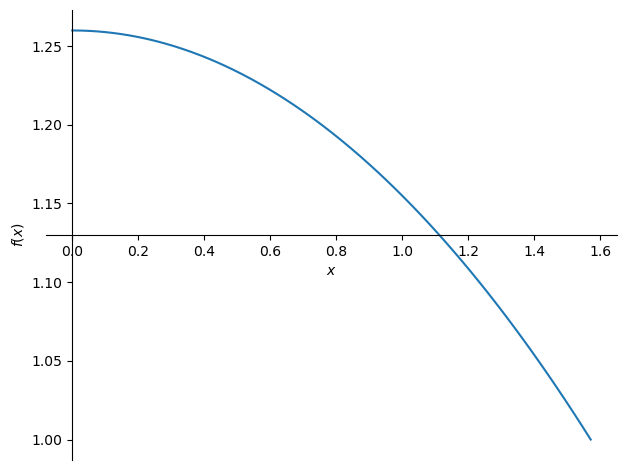

In [10]:
x = sp.symbols('x')
f = (1+sp.cos(x))**(1/3)
sp.plot(f,(x,0,np.pi/2))

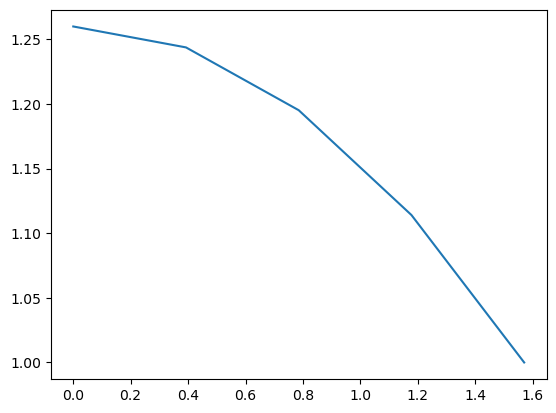

In [11]:
xp =[0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2]
yp=[f.subs({x:i}) for i in xp]
plt.plot(xp,yp)

## Example 05
**Simpson’s Method** is another approximation to the integral which uses parabolas instead
of lines to approximate $f (x)$:
$$\int_a^bf(x)dx \approx \frac{\Delta x}{3} \bigg[f(x_0)+2f(x_1)+4f(x_2)+ 2f(x_3)+4f(x_4)+\cdots +4f(x_{n-2})+2f(x_{n-1})+f(x_{n})\bigg]$$ 

* Use the function **simps** in the **scipy.integrate** package to compute Simpson’s Approximation using $n = 100$ subintervals.
* The value of the integral to $14$ decimal places is $1.84324968816264$. Use this value to estimate the error $|\text{actual} − \text{estimate}|$ in each of the five approximations

In [12]:
SimpsResult = sci.integrate.simps(ytrapz,xtrapz)
print("The Simpson Rule approximation is", SimpsResult)

The Simpson Rule approximation is 1.8432496881501192


In [13]:
actual  = 1.84324968816264
print("Absolute error in Right End point Approximation is", abs(actual-RL))
print("Absolute error for Left End point Approximation is", abs(actual-LR))
print("Absolute error for Mid Point Rule is", abs(actual-MP))
print("Absolute error for Trapezoid Rule is", abs(actual-result))
print("Absolute error for Simpson's Rule is", abs(actual-SimpsResult))

Absolute error in Right End point Approximation is 0.002048269040967554
Absolute error for Left End point Approximation is 0.0020345612633476673
Absolute error for Mid Point Rule is 0.01574555206243189
Absolute error for Trapezoid Rule is 6.853888809832398e-06
Absolute error for Simpson's Rule is 1.2520651182512665e-11
